In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   version        560 non-null    category
 1   type           560 non-null    object  
 2   sample         560 non-null    int64   
 3   n              560 non-null    int64   
 4   time(s)        560 non-null    float64 
 5   Normalized_ns  560 non-null    float64 
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 22.9+ KB
  version type  sample    n  time(s)  Normalized_ns
0    ver5    f       0  350    0.174         4.0583
1    ver5    f       1  350    0.180         4.1983
2    ver5    f       2  350    0.173         4.0350
3    ver5    f       3  350    0.175         4.0816
4    ver5    f       4  350    0.175         4.0816
===========          TABLA ANOVA 3 factors         ================
                               sum_sq     df             F         PR(>F)
C(vers

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['alpha']
  warnings.warn(msg, ValueWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints d

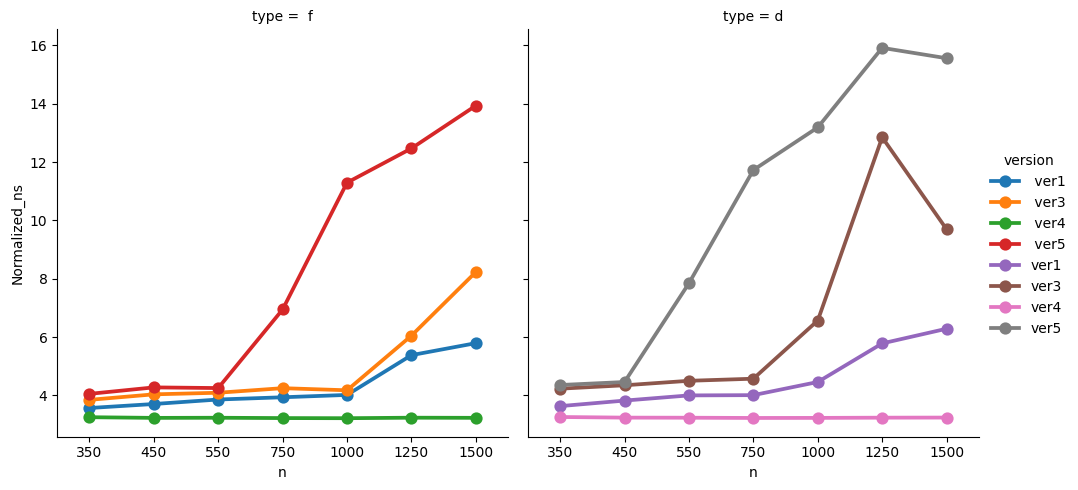

In [ ]:
from google.colab import drive
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import numpy as np

#!pip install researchpy
#import researchpy as rp
# @ load data
#drive.mount('/content/drive/')
filename = 'ReporteDatosSem16_double.xlsx'
search_path = '/content/drive/MyDrive/University/Quinto_Semestre/LAB-Arqui-compu/S16/'
file_path = os.path.join(search_path, filename)
#file_path='Data_3Factores.xlsx'
df = pd.read_excel(file_path,'Tres_factores')
df = df.rename(columns={"Normalized(ns)":"Normalized_ns"})
df['version'] = pd.Categorical(df['version'])
df.info()

# Mostramos los primeros registros de los datos
print(df.head())
# Realizamos el análisis de la interacción triple (A x B x C) usando ANOVA
formula = 'Q("Normalized_ns") ~ C(version) + C(n) + C(type) + C(version)*C(n) + C(version)*C(type)+ C(type)*C(n) + C(version)*C(type)*C(n)'  # Indicamos que queremos evaluar todas las interacciones de tres vías
modelo3Factors = ols(formula, alpha=0.05, data=df).fit()
print("===========          TABLA ANOVA 3 factors         ================")
anova_table3 = sm.stats.anova_lm(modelo3Factors, typ=2)

print(anova_table3)
print(" ")

print("Valor p para C(version):", anova_table3.loc['C(version)', 'PR(>F)'])
print("Valor p para C(n):", anova_table3.loc['C(n)', 'PR(>F)'])
print("Valor p para type(n):", anova_table3.loc['C(type)', 'PR(>F)'])
print("alpha: 0.05")
print("")
print("")
# Creamos la gráfica de interacciones
sns.catplot(x='n', y='Normalized_ns', col='type', hue='version', kind='point', data=df, ci=None)
plt.show()
#interaction_plot